# Avaliação C3

- Disciplina: Análise de Dados Aplicada a Computação
- Professor: Howard Roatti
- Turma: 5SC1
- Atividade: Análise de Dados e Machine Learning Hackathon

Integrantes:
- Gabriel Cardozo Ansesqui Rangel
- Lucas Carlos Giacomin
- Matheus de Paula Barbosa
- Nathan da Silva Bravin

# Importações

Possuem o objetivo de permitir a construção de estruturas de dados para podermos realizar análises; permite a importação de métodos úteis para classificação e mensurização dos dados; e também importam certos métodos de cálculo relevantes para certas questões.

In [63]:
# Importando biblioteca Pandas para a criação e manipulação de DataFrames.
import pandas as pd

# Importando o Numpy.
import numpy as np

# Importando o método PLT para visualizar graficamente os dados, cálculos e regressões que aplicarmos.
import matplotlib.pylab as plt

# Importando o método PreProcessing da biblioteca SKLearn para aplicar Label Encoding.
from sklearn import preprocessing

# Importando o método LogisticRegression para poder realizar regressões logísticas no DataFrame.
from sklearn.linear_model import LogisticRegression

# Importando o método LinearRegression para poder realizar regressões lineares no DataFrame.
from sklearn.linear_model import LinearRegression

# Importando os métodos MSE para obter a margem de erro de nossas estimativas, o método confusion_matrix para poder realizar 
# matrizes de confusão, e método AUC para podermos visualizar a curva ROC.
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

from sklearn.model_selection import KFold, LeaveOneOut, train_test_split, cross_val_score

from numpy import mean, absolute, sqrt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn.linear_model import Lasso

from sklearn import metrics

In [2]:
# Importando dataset de dados de treino:
dataTreino = pd.read_csv("./Datasets/ticdata2000.txt", sep="	", header=None)
dataTreino.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Importando dataset de dados de validação:
dataValidacao = pd.read_csv("./Datasets/ticeval2000.txt", sep="	", header=None)
dataValidacao.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# Importando dataset de rótulos de classificação:
dataClassificao = pd.read_csv("./Datasets/tictgts2000.txt", header=None)
dataClassificao.head()

,0
0,0
1,1
2,0
3,0
4,0


# Análise Exploratória de Dados

In [5]:
dataTreino.describe()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [6]:
dataTreino.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
81    int64
82    int64
83    int64
84    int64
85    int64
Length: 86, dtype: object

In [7]:
dataTreino.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
81    0
82    0
83    0
84    0
85    0
Length: 86, dtype: int64

<AxesSubplot:ylabel='Frequency'>

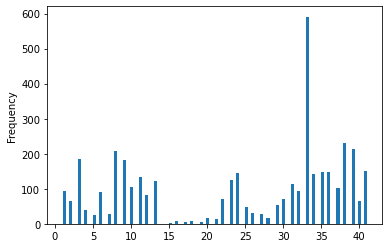

In [8]:
dataValidacao[0].plot.hist(bins=100)

**Comentário:** O histograma acima mostra o subtipo de cada cliente, tendo em vista isso, podemos observar que a maior parte do subtipo de família que está mais suscetível a solicitar o seguro são famílias grandes de baixa classe, e com base nos segundos subtipos que mais solicitam podemos constatar que maior parte dos pedidos são por famílias tradicionais que possívelmente não possuem outros meios de repor seus bens perdidos.

<AxesSubplot:ylabel='Frequency'>

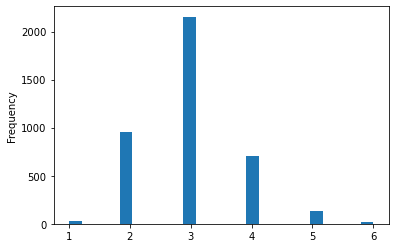

In [9]:
dataValidacao[3].plot.hist(bins=24)

**Comentário:** O histograma acima mostra a faixa de idades de cada cliente. A esmagadora maioria dos pedidos são compostos por pessoas entre 40 e 50 anos, ou seja, de meia idade, que tendem mais a tomar ações conservadoras.

<AxesSubplot:ylabel='Frequency'>

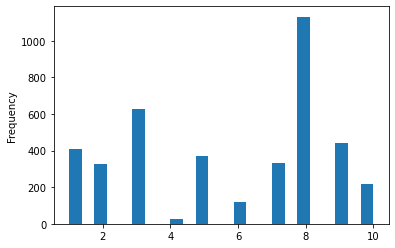

In [10]:
dataValidacao[4].plot.hist(bins=24)

**Comentário:** O histograma acima mostra o tipo principal de cada cliente. Os dados nos mostram que a maior parte dos pedidos são constituidos por famílias majoritariamente por adultos, esta análise pode não ser útil posteriormente pois crianças e adolescentes não podem utilizar carros, o que logicamente coloca os adultos em posição superior.

# Análise Cruzada

## Lasso

In [11]:
X = dataTreino.loc[:, dataTreino.columns != 85]
y = dataTreino[85]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(-0.002238566177029666, 0.0)

In [12]:
lasso.coef_

array([-0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,
        0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

## Modelo Logistic Regression

In [68]:
X = dataTreino.loc[:, dataTreino.columns != 85]
y = dataTreino[85]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

model = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
model.fit(X_train, y_train)
preds = model.predict(X_test) 

kfold_validation = KFold(10)

result = cross_val_score(model, X_test, y_test, cv = kfold_validation)
print(result)
print(np.mean(result))

[0.90857143 0.93714286 0.93714286 0.91428571 0.92       0.93714286
 0.91428571 0.93678161 0.94252874 0.94827586]
0.9296157635467981


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

array([[5468,    6],
       [ 343,    5]], dtype=int64)

In [73]:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]))
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]))

Revocação (Recall):  0.9800876872488126
Precisão (Precision):  0.9791932834458843


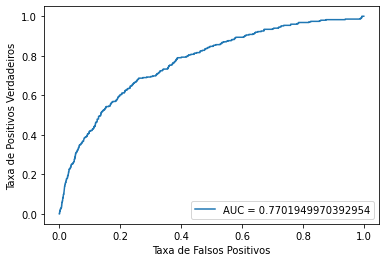

In [24]:
# Visualização da curva ROC de acordo com a métrica AUC.
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

## Modelo kNN

In [33]:
X = dataTreino.loc[:, dataTreino.columns != 85]
y = dataTreino[85]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

kfold_validation = KFold(10)

result = cross_val_score(model, X_test, y_test, cv = kfold_validation)
print(result)
print(np.mean(result))

[0.90857143 0.94857143 0.95428571 0.94285714 0.93142857 0.93714286
 0.93714286 0.93678161 0.94252874 0.94252874]
0.938183908045977


In [34]:
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

array([[5474,    0],
       [ 348,    0]], dtype=int64)

In [35]:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]))
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]))

Revocação (Recall):  1.0
Precisão (Precision):  0.9402267262109241


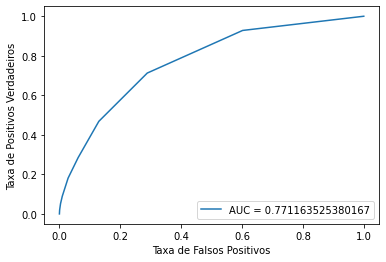

In [36]:
# Visualização da curva ROC de acordo com a métrica AUC.
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

## Modelo Decision Tree

In [62]:
X = dataTreino.loc[:, dataTreino.columns != 85]
y = dataTreino[85]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

kfold_validation = KFold(10)

result = cross_val_score(model, X_test, y_test, cv = kfold_validation)
print(result)
print(np.mean(result))

[0.86857143 0.90285714 0.92       0.86285714 0.90285714 0.92
 0.86857143 0.8908046  0.87931034 0.87931034]
0.8895139573070606


In [46]:
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

array([[5365,  109],
       [ 114,  234]], dtype=int64)

In [47]:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]))
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]))

Revocação (Recall):  0.9800876872488126
Precisão (Precision):  0.9791932834458843


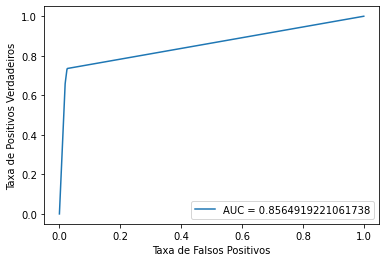

In [48]:
# Visualização da curva ROC de acordo com a métrica AUC.
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

# Referências

- [Stack Overflow Loading TXT with Pandas](https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas)
- [Vitalflux Hold-out Method for Training Machine Learning Models](https://vitalflux.com/hold-out-method-for-training-machine-learning-model/)
- [Statology K-Fold Cross Validation](https://www.statology.org/k-fold-cross-validation-in-python/)
- [Statology Leave-one-out (LOO) Cross Validation](https://www.statology.org/leave-one-out-cross-validation-in-python/)
- [Skelearn Feature Select](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Machine Learning Mastery K-Fold](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/)
- [Machine Learning Knowledge Cross Validation](https://machinelearningknowledge.ai/cross-validation-in-sklearn-hold-out-approach-k-fold-cross-validation-loocv/)
- [Towards Data Science Machine Learning Classification](https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5)